In [ ]:
!pip install umap-learn

     |████████████████████████████████| 81kB 3.9MB/s 
     |████████████████████████████████| 1.2MB 8.6MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=b92c139a72337b7404f1345ddc0bd0af42c2aacec9bc5c7e4478deeaad6498b4
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=961a1a6f0ff28d2b633e0a73d1ad4a485ed959fa6f2ed004cbec63ac6f89f304
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


In [ ]:
!pip install -U gensim

     |████████████████████████████████| 23.9MB 1.4MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import pandas as pd
import numpy as np
import psycopg2 as pg
import matplotlib.pyplot as plt
%matplotlib inline

from gensim import models
from gensim.models import Word2Vec, KeyedVectors
from gensim.models import Phrases
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)
/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
def load_data():
  conn = pg.connect(
    database="db_dsa", 
    user="udsa", 
    password="P@ssword2021", 
    host="92.242.58.173", 
    port="1984"
  ) 
  cur = conn.cursor()
  cur.execute("SELECT NAME, TYPE from PROJECTS")
  rows = cur.fetchall()
  return pd.DataFrame(rows, columns=['NAME', 'TYPE'])

In [ ]:
df = load_data()

In [ ]:
df.loc[30, 'NAME']

'Бинарная переключаемая цепь оптических линий задержки, управляющая фазированной решеткой для мобильной связи 5G'

In [ ]:
feature_size = 300    # Word vector dimensionality  
window_context = 3          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words
corpus = list(map(lambda x: list(x), df[['NAME']].values))

In [ ]:
corpus[0]

['Численное и аналитическое исследование эффекта Саффмана-Тейлора']

In [ ]:
model = Word2Vec(corpus, vector_size=feature_size, 
                          window=window_context, min_count=min_word_count, epochs=1000, sg=1)

In [ ]:
model.wv[['Численное и аналитическое исследование эффекта Саффмана-Тейлора', 'Численное и аналитическое исследование эффекта Саффмана-Тейлора']].shape

(2, 300)

In [ ]:
model.wv.most_similar('Численное и аналитическое исследование эффекта Саффмана-Тейлора', topn=5)

[('SIP-коммуникатор', 0.144867941737175),
 ('Разработка цифровой системы обучения литературному мастерству',
  0.1441175639629364),
 ('Моделирование пространственно-распределенных эволюционных игр',
  0.12431621551513672),
 ('Исследование влияния параметров геометрии рабочих инструментов на формирование остаточных напряжений в проволоках круглых сечений',
  0.12132144719362259),
 ('Разработка модуля адаптивной аутентификации для веб-ориентированной платформы',
  0.11690745502710342)]

In [ ]:
def scatterplot(model, target, decompose_fn, *args, **kwargs):
  similar_words = model.wv.most_similar(target, topn=10)
  data = model.wv[np.array(similar_words + [(target, 0)])[:, 0]]
  labels = np.array(similar_words + [(target, 0)])[:, 0]
  decompose = decompose_fn(*args, **kwargs).fit_transform(data)
  plt.figure(figsize=(18, 12))
  plt.scatter(decompose[:, 0], decompose[:, 1], c='orange', edgecolors='r')
  plt.scatter(decompose[:, 0], decompose[:, 1], c='orange', edgecolors='r')
  for label, x, y in zip(labels, decompose[:, 0], decompose[:, 1]):
    print(x, y)
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

9.335074 130.14978
59.511528 117.43909
50.409832 -29.238598
-114.927795 -197.54079
-160.55566 -181.85855
210.34909 -186.7431
147.89616 118.840454
82.36738 229.29785
116.137054 -94.64612
-29.70428 -23.39725
64.74384 55.852535


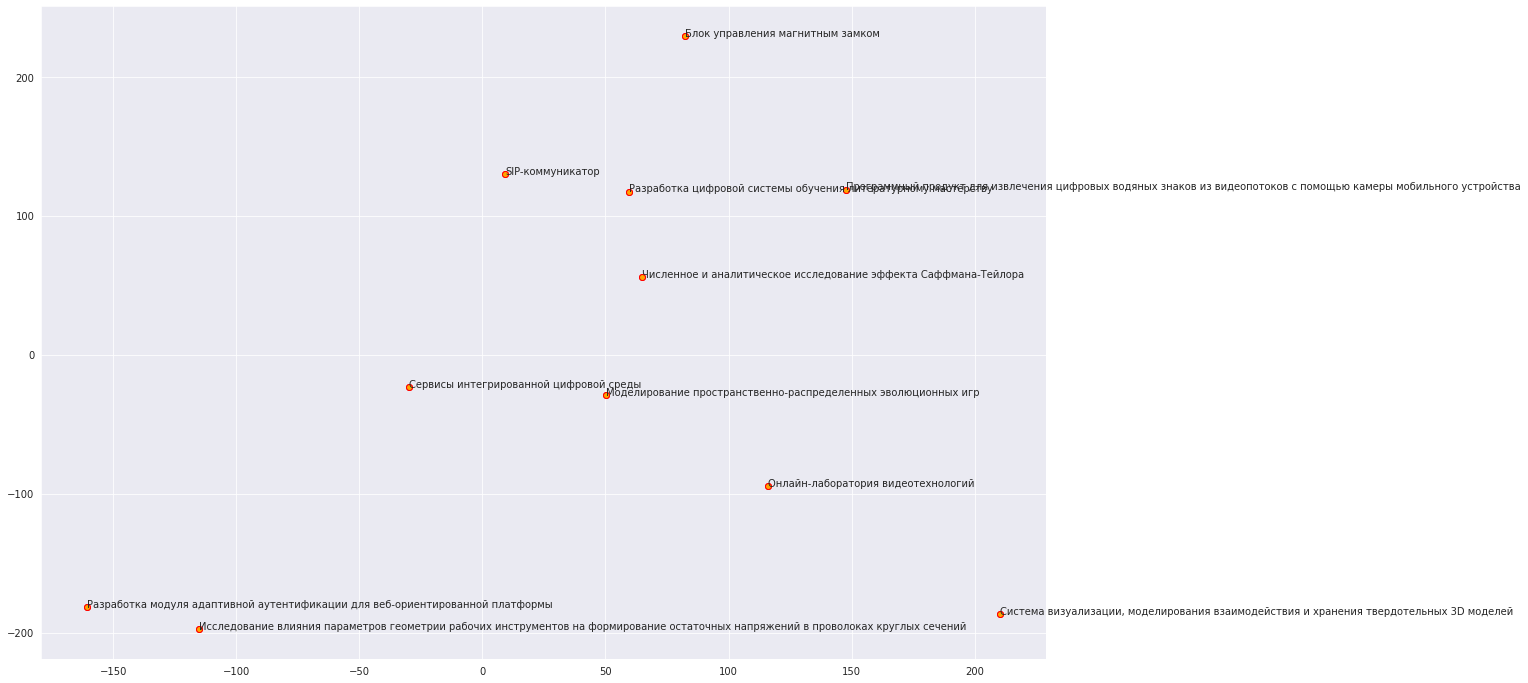

In [ ]:
scatterplot(model, 'Численное и аналитическое исследование эффекта Саффмана-Тейлора', decompose_fn=TSNE, n_components=2, random_state=0, n_iter=10000, perplexity=2)

-0.002003138 -0.014933301
0.006703893 -0.013251778
-0.0068063103 0.010174797
-0.0009170141 0.016373374
0.0048233103 0.018861061
-0.01863622 -0.006197981
0.011732874 -0.010569453
0.022468636 0.0010491689
-0.0050463225 0.0032205363
-0.015011988 -0.0037350547
0.0026922638 -0.0009913552


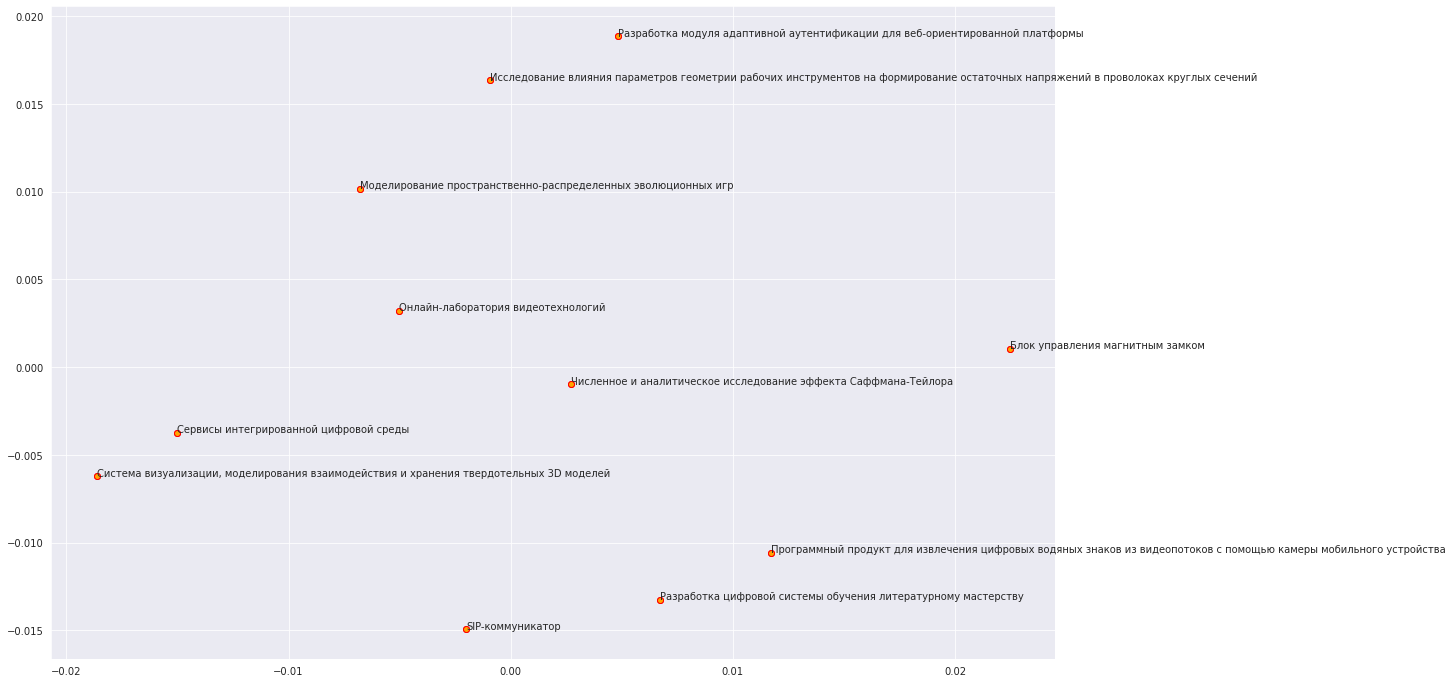

In [ ]:
scatterplot(model, 'Численное и аналитическое исследование эффекта Саффмана-Тейлора', decompose_fn=PCA, n_components=2, random_state=0)

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


16.450352 11.375549
16.667894 10.475816
18.630129 11.166274
18.88111 10.395611
18.375053 9.763249
17.362984 12.028333
16.998827 9.729049
17.790947 10.521911
18.04911 11.715534
17.252981 11.149462
17.697329 9.951169


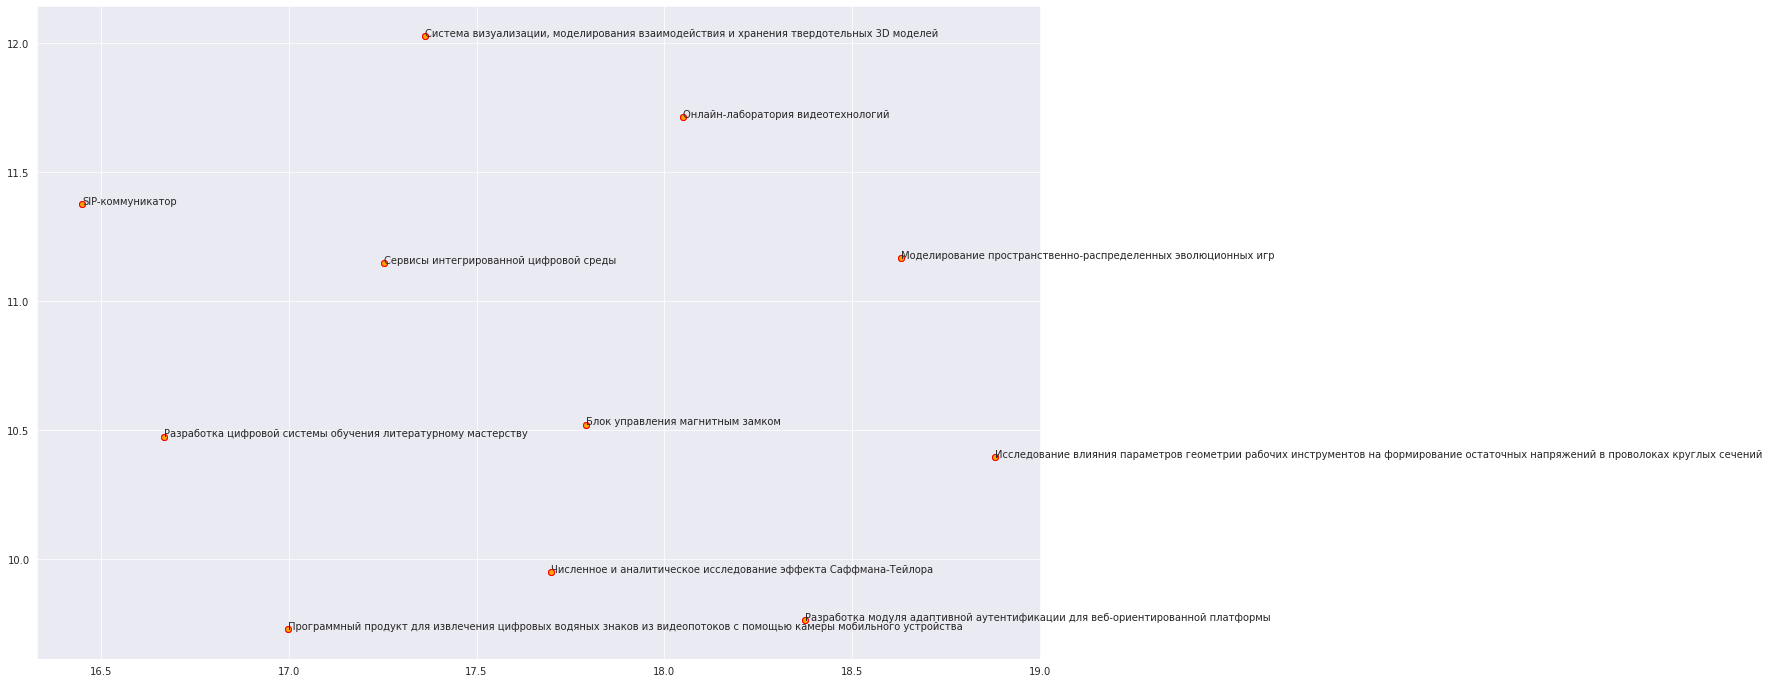

In [ ]:
scatterplot(model, 'Численное и аналитическое исследование эффекта Саффмана-Тейлора', decompose_fn=umap.UMAP, n_components=2, random_state=0)

In [ ]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
   
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [ ]:
w2v_feature_array = averaged_word_vectorizer(corpus=corpus, model=model,
                                             num_features=feature_size)
pd.DataFrame(w2v_feature_array)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0.001944,-0.003296,-0.002339,-0.001715,0.001953,0.000767,0.003286,-0.001298,-0.000721,0.000253,-0.001400,0.000842,-0.000026,-0.001694,0.000239,0.002375,-0.002314,-0.002132,0.002999,-0.002124,-0.001181,0.002800,0.000638,0.000802,-0.000549,0.003333,0.001410,0.000733,0.001978,0.000388,-0.000390,-0.001034,0.002093,-0.000959,0.002726,0.001888,0.000696,0.001703,0.001386,0.000484,...,0.002829,0.002943,-0.000284,0.001374,-0.002554,-0.001132,-0.001898,-0.002104,0.000819,0.000375,-0.002762,-0.001928,-0.000090,-0.002158,0.003235,-0.003109,-0.001077,0.001867,-0.002727,0.000965,0.002469,-0.002584,0.002293,0.002642,0.000453,0.001829,0.000149,-0.003198,-0.002718,0.001163,0.001973,-0.002645,-0.001291,0.000958,-0.002581,-0.002848,0.001412,0.001417,-0.003177,-0.001848
1,-0.002478,0.001930,-0.002777,0.001362,0.001389,-0.000839,-0.002714,-0.001158,-0.001616,-0.001706,0.001653,-0.001800,-0.002567,0.002137,0.002951,0.000656,-0.001306,-0.000203,0.002057,0.000538,-0.000580,0.000363,0.000446,0.001497,-0.003184,0.000211,0.001322,0.001597,-0.001757,-0.002366,-0.000285,-0.002016,-0.001917,-0.001789,0.000698,0.001556,-0.002811,0.001722,0.000049,0.003138,...,0.002637,-0.002494,0.002975,-0.001724,0.001058,0.003241,-0.003065,0.002907,-0.001177,-0.000672,0.001147,-0.001776,-0.002224,0.001407,-0.003179,-0.000364,0.000560,-0.000697,0.003087,0.000457,0.001164,-0.003333,-0.001913,-0.001682,0.000634,-0.000107,-0.000612,0.000654,0.001005,0.002214,-0.000797,0.001389,0.000294,0.003144,0.001795,0.002278,-0.002283,-0.000756,-0.000990,0.003267
2,0.001758,-0.001025,-0.002820,0.002461,-0.003064,0.000445,0.002746,-0.002518,0.003161,0.003094,-0.000805,-0.001286,-0.003100,-0.001283,0.000612,-0.001110,-0.001538,-0.001318,-0.002007,0.002650,-0.000964,0.002192,-0.000549,-0.002504,0.003001,-0.001173,-0.002538,0.001333,0.000607,0.002023,0.000285,0.000989,-0.002032,0.000455,-0.001258,0.002448,0.001873,0.001099,0.001278,-0.003046,...,-0.001961,0.000830,0.002092,-0.002782,0.002657,0.000249,-0.001861,-0.000963,0.001292,-0.002980,0.002078,-0.001315,0.000595,0.001120,0.002526,-0.000153,-0.002741,0.002728,-0.000338,-0.002857,0.000378,0.001332,0.001159,0.002917,-0.000180,-0.000956,0.001535,0.000319,0.000920,0.002932,0.000608,-0.003132,-0.000351,0.000469,0.000007,0.001113,-0.001849,0.001099,-0.001059,-0.001263
3,-0.003184,-0.003094,0.001692,0.001504,0.000345,0.001851,-0.003332,0.000639,0.000751,0.000493,0.002547,0.001363,-0.002971,-0.003316,0.002664,-0.003149,0.002311,-0.000874,0.002423,0.001372,0.000614,-0.002530,-0.002119,0.000890,-0.001455,0.001015,-0.000294,-0.002615,-0.003320,0.003124,-0.000415,-0.002335,-0.003309,0.000307,0.000644,0.003316,-0.000988,-0.001497,-0.001611,-0.001020,...,-0.001464,0.000387,0.001164,-0.002628,0.002818,0.000792,-0.001850,-0.001821,0.001151,0.000946,-0.001042,-0.000346,-0.002127,-0.000953,0.002709,-0.001971,-0.000989,0.000837,-0.000517,-0.002392,-0.003140,0.000710,0.001413,0.003011,0.000633,-0.000042,-0.003170,0.000662,0.000970,0.000548,0.000249,0.000338,-0.002206,-0.000054,-0.000627,0.002517,-0.001006,-0.000265,-0.001040,0.000803
4,-0.003096,-0.001398,-0.000038,0.001609,0.002662,0.000632,0.002316,0.001390,-0.000211,-0.000536,-0.000970,0.002215,-0.002517,-0.002169,-0.003116,-0.000418,-0.000495,-0.003313,-0.002353,0.002620,0.003291,-0.000839,-0.001324,0.000903,0.003024,-0.002878,0.001669,0.001260,0.002977,0.002120,-0.003284,0.001777,0.002225,-0.003297,-0.002700,-0.002114,0.000094,0.001693,-0.002976,0.000663,...,0.002068,-0.003118,0.002912,-0.003238,0.000523,-0.001961,0.001454,0.000909,0.001460,-0.000679,0.001142,0.001553,0.001957,-0.002082,0.001697,0.000445,-0.001923,0.001440,-0.002924,-0.003103,-0.001904,-0.001105,0.001503,-0.002992,-0.002650,0.002881,0.002106,-0.003283,0.001174,0.0023

In [ ]:
from sklearn.cluster import AffinityPropagation
import sklearn.metrics as metrics

af = AffinityPropagation(max_iter=500)
af.fit(w2v_feature_array)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

In [ ]:
from sklearn.neighbors import NearestNeighbors

def vizualize(data, decompose_fn, *args, **kwargs):
  af = AffinityPropagation(max_iter=500)
  af.fit(data)
  cluster_centers_indices = af.cluster_centers_indices_
  n_clusters_ = len(cluster_centers_indices)
  labels = af.labels_
  X = decompose_fn(*args, **kwargs).fit_transform(data)
  labels = af.labels_
  categories = list(df['TYPE'])
  names = list(df['NAME'])
  plt.figure(figsize=(18, 12))

  colors = {'nir': 'orange', 'soft': 'blue', 'soft-hard': 'green', 'startup': 'red'}
  for k in range(n_clusters_):
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=11)
  for i in range(len(labels)):
      label = labels[i]
      annotation_label = categories[i]
      color = colors[annotation_label]
      x, y = X[i]
      plt.scatter(x, y, c=color, edgecolors='k')
      plt.annotate(annotation_label, xy=(x+1e-5, y+1e-4), xytext=(0, 0), textcoords='offset points')

  knn = NearestNeighbors(n_neighbors=5)
  knn.fit(X)
  _, indices = knn.kneighbors([X[cluster_centers_indices[3]]])
  for k in range(n_clusters_):
    print(f'Названия в {k} кластере:')
    _, indices = knn.kneighbors([X[cluster_centers_indices[k]]])
    for i in indices[0][1:]:
      print(df.loc[i, 'NAME'])

In [ ]:
df.loc[82, 'NAME']

'Создание графического интерфейса анализа больших данных на платформе Apache Zeppelin'

Названия в 0 кластере:
Развитие методов глубокого машинного обучения для анализа микроструктур твердых сплавов
МИЭМ Quality assurance / Автоматизация контроля качества сервисов цифрового МИЭМ
Система автоматизации рейтингов ВУЗов
Геометрические методы анализа данных
Названия в 1 кластере:
Автоматизированный комплекс для измерения характеристик и экстракции параметров SPICE-модели партий МОП-транзисторов на основе тестера электронных компонентов серии «Формула»
Асимптотика спектра оператора типа Хартри
Телецентр МИЭМ
Разработка и реализация методов идентификации людей на тепловизионном изображении
Названия в 2 кластере:
Разработка программных агентов для взаимодействия конечных устройств с облачной платформой Интернета вещей
Создание и интеграция кластера kubernetes для внедрения и поддержки проектной деятельности
Анализ предельных конфигураций в многоагентной системе с локальным взаимодействием
Разработка веб-скрапера для извлечения данных о надежности телекоммуникационного оборудовани

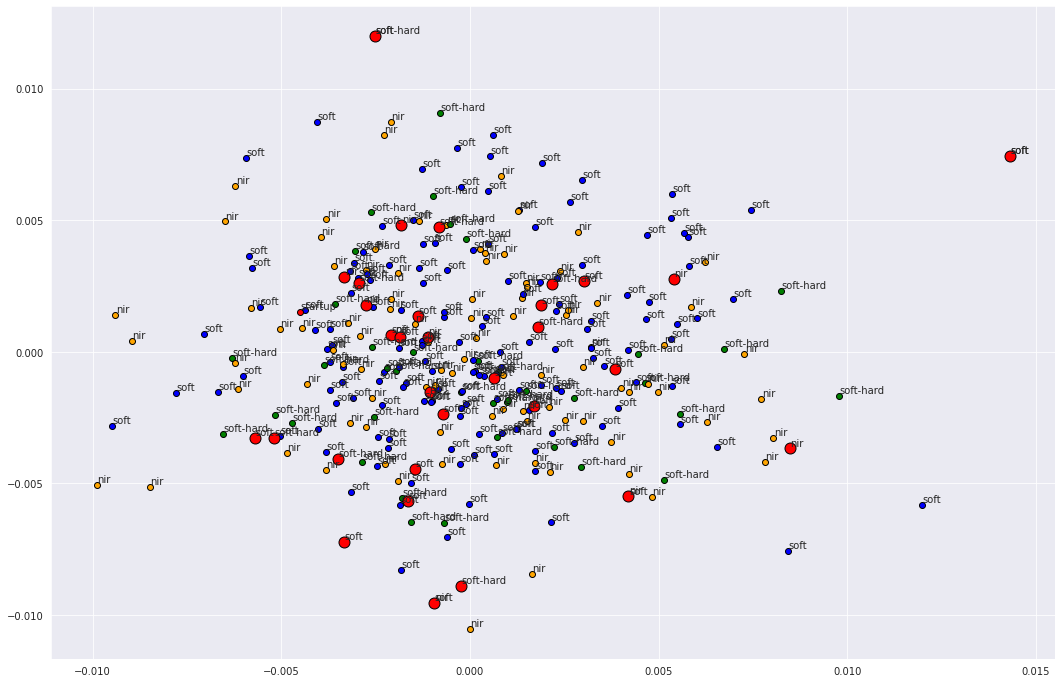

In [ ]:
vizualize(w2v_feature_array, PCA, n_components=2, random_state=0)

Названия в 0 кластере:
Онлайн-сервисы Цифрового МИЭМа
Разработка системы автоматической оценки политик безопасности DLP-комплекса 
Разработка управляющей программы и инструкции для автоматизированного измерения параметров микросхем операционных усилителей с использованием тестера Формула-2к
Автоматизация исследования методов анализа кардиологических данных для выявления наличия респираторных заболеваний на основе использования ПО IBM SPSS
Названия в 1 кластере:
Автоматизированный комплекс для измерения характеристик и экстракции параметров SPICE-модели партий МОП-транзисторов на основе тестера электронных компонентов серии «Формула»
Изучение современной и древней ДНК методами популяционной геномики
Инструмент оценивания средств трансляции речи в текст
Доверенная клавиатура
Названия в 2 кластере:
Устройство для сигнализации водителю о риске столкновения транспортных средств
Разработка устройства защиты микроконтроллерных модулей от перенапряжений на входах
Дистанционное управление робот

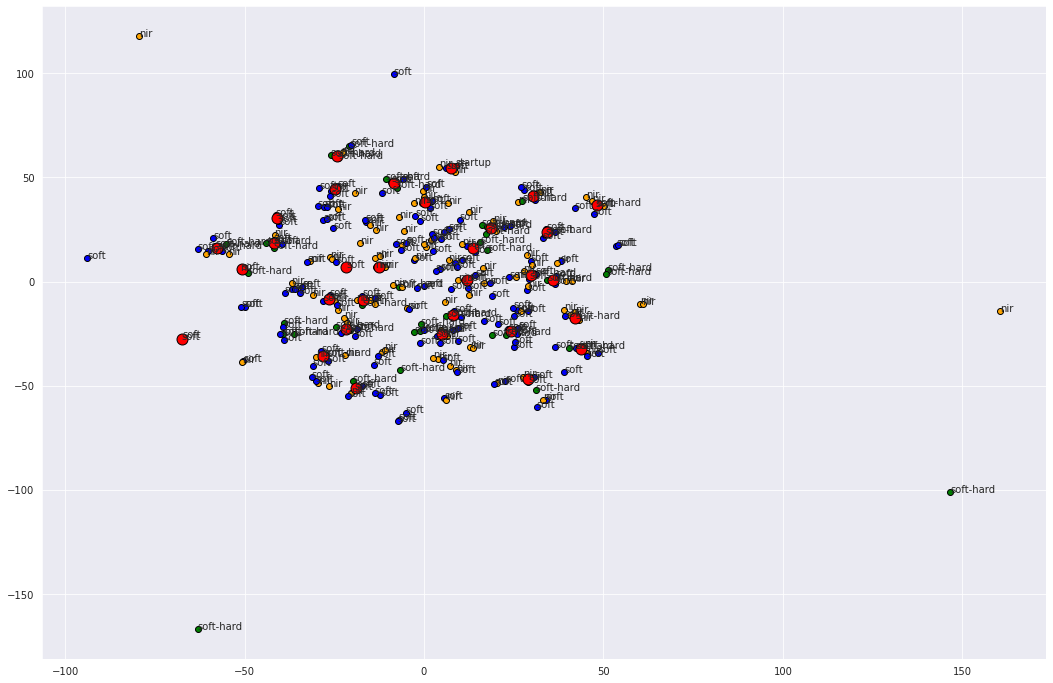

In [ ]:
vizualize(w2v_feature_array, decompose_fn=TSNE, n_components=2, random_state=0, n_iter=1000, perplexity=2)

Названия в 0 кластере:
Экзотические фазы сильно коррелированных фермионов в низких размерностях
Молекулярно-динамическое исследование корреляций в жидкостях и стеклах
Разработка системы автоматической оценки политик безопасности DLP-комплекса 
Онлайн-сервисы Цифрового МИЭМа
Названия в 1 кластере:
Изучение современной и древней ДНК методами популяционной геномики
Автоматизированный комплекс для измерения характеристик и экстракции параметров SPICE-модели партий МОП-транзисторов на основе тестера электронных компонентов серии «Формула»
Инструмент оценивания средств трансляции речи в текст
Разработка программной части системы управления микроклиматом в помещении
Названия в 2 кластере:
test4
Инфраструктура МИЭМ
Факультетский каталог пакетов Python (PyPI)
Устройство для сигнализации водителю о риске столкновения транспортных средств
Названия в 3 кластере:
Идентификация реологических параметров сверхпластичных материалов по результатам механических испытаний по формовке в конус
Перспективная

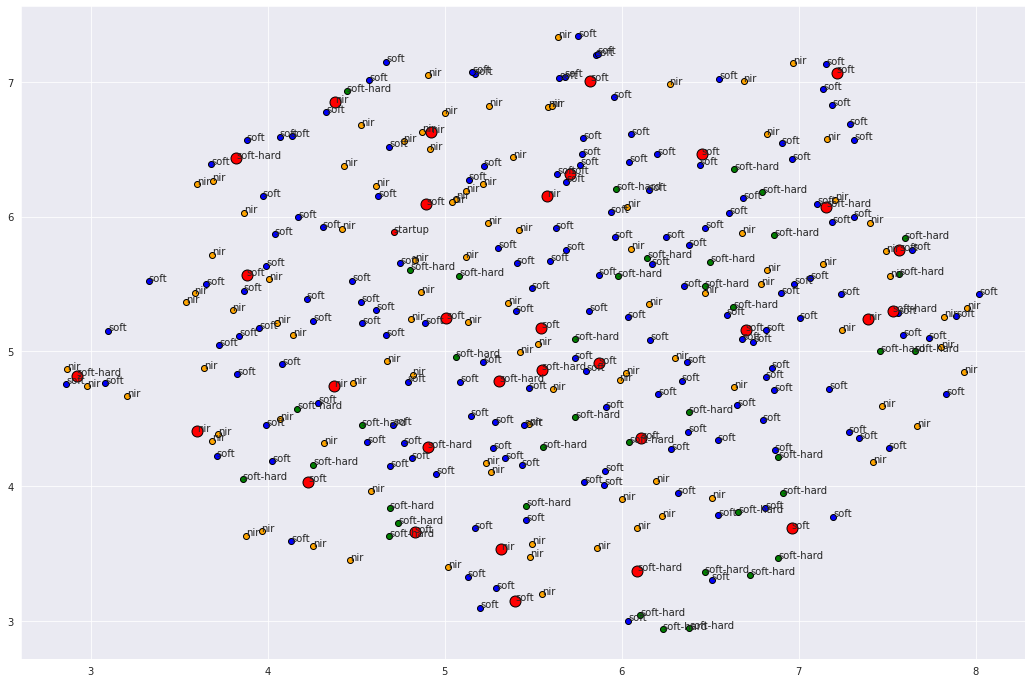

In [ ]:
vizualize(w2v_feature_array, decompose_fn=umap.UMAP, n_components=2, random_state=0)